In [2]:
!pip3 install pandas numpy matplotlib scikit-learn statsmodels prophet fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached fbprophet-0.7.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached fbprophet-0.6.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached fbprophet-0.5.tar.gz (49 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/nm/65ts1ktd7kn2d8g4gyv4bns40000gn/T/pip-install-85dsn2yc/fbprophet_0fd67d253f844f78b199dfeb99e79dfb/setup.py", line 98, in <module>
     

In [95]:
# imports time series
import pandas as pd
import numpy as np
import random

# plots
import matplotlib.pyplot as plt
%matplotlib inline

# para calcular métricas del modelo
from sklearn.metrics import mean_squared_error

# misc
import os
import time
import itertools
import warnings
warnings.filterwarnings("ignore")

# apartado ts
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

from prophet import Prophet

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# GLOBAL_VARIABLES
CWD = os.getcwd()
DATA_PATH = os.path.join(CWD, "data")

In [5]:
print("Working with these versions of libraries\n")
print(f"Numpy version {np.__version__}")
print(f"Pandas version {pd.__version__}")
print(f"Statsmodels version {sm.__version__}")

Working with these versions of libraries

Numpy version 1.23.5
Pandas version 1.5.3
Statsmodels version 0.13.5


In [6]:
df = pd.read_csv('/Users/marianapirez/Desktop/CAPS2/TASK 1/merge_final_last.csv')

In [7]:
pd.set_option('display.max_rows', 100)
df.head(1)

,item,category_x,store,store_code,region,quantity,date,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,Greenwich_Village,NYC_1,New York,0,2011-01-29,201104,0.0


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df

,item,category_x,store,store_code,region,quantity,date,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,Greenwich_Village,NYC_1,New York,0,2011-01-29,201104,0.000
1,ACCESORIES_1_002,ACCESORIES,Greenwich_Village,NYC_1,New York,0,2011-01-29,201104,0.000
2,ACCESORIES_1_003,ACCESORIES,Greenwich_Village,NYC_1,New York,0,2011-01-29,201104,0.000
3,ACCESORIES_1_004,ACCESORIES,Greenwich_Village,NYC_1,New York,0,2011-01-29,201104,0.000
4,ACCESORIES_1_005,ACCESORIES,Greenwich_Village,NYC_1,New York,0,2011-01-29,201104,0.000
...,...,...,...,...,...,...,...,...,...
58327365,SUPERMARKET_3_823,SUPERMARKET,Queen_Village,PHI_3,Philadelphia,1,2016-04-24,201616,3.576
58327366,SUPERMARKET_3_824,SUPERMARKET,Queen_Village,PHI_3,Philadelphia,0,2016-04-24,201616,2.976
58327367,SUPERMARKET_3_825,SUPERMARKET,Queen_Village,PHI_3,Philadelphia,0,2016-04-24,201616,4.776
58327368,SUPERMARKET_3_826,SUPERMARKET,Queen_Village,PHI_3,Philadelphia,3,2016-04-24,201616,1.536


In [10]:
df = df.set_index("date")

In [11]:
df_weekly = df.groupby(['item', 'store']).resample('W').sum().reset_index()

**DATASET AGRUPADO POR SEMANA**

In [12]:
df_weekly

,item,store,date,quantity,yearweek,sell_price
0,ACCESORIES_1_001,Back_Bay,2011-01-30,0,402208,0.0
1,ACCESORIES_1_001,Back_Bay,2011-02-06,0,1407735,0.0
2,ACCESORIES_1_001,Back_Bay,2011-02-13,0,1407742,0.0
3,ACCESORIES_1_001,Back_Bay,2011-02-20,0,1407749,0.0
4,ACCESORIES_1_001,Back_Bay,2011-02-27,0,1407756,0.0
...,...,...,...,...,...,...
8354255,SUPERMARKET_3_827,Yorktown,2016-03-27,11,1411284,8.4
8354256,SUPERMARKET_3_827,Yorktown,2016-04-03,28,1411291,8.4
8354257,SUPERMARKET_3_827,Yorktown,2016-04-10,22,1411298,8.4
8354258,SUPERMARKET_3_827,Yorktown,2016-04-17,17,1411305,8.4


**ELIMINO COLUMNAS QUE NO ME SIRVEN**

In [13]:
columnas_a_eliminar = ['yearweek','sell_price']
df = df_weekly.drop(columnas_a_eliminar, axis=1)

In [14]:

df.head(2)

,item,store,date,quantity
0,ACCESORIES_1_001,Back_Bay,2011-01-30,0
1,ACCESORIES_1_001,Back_Bay,2011-02-06,0


In [15]:
!pip3 --version
!python --version

pip 22.3.1 from /Users/marianapirez/anaconda3/lib/python3.10/site-packages/pip (python 3.10)
Python 3.10.9


In [16]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [56 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib
      creating build/lib/fbprophet
      creating build/lib/fbprophet/stan_model
      NumExpr defaulting to 4 threads.
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/nm/65ts1ktd7kn2d8g4gyv4bns40000gn/T/pip-install-84nfrlmj/fbprophet_eadcf46739944a988ae9b02cf28ed7cc/setup.py", line 122, in <module>
          setup(
        File "/Users/marianapirez/anaconda3/lib/python3.10/site-packages/setuptools/__init__.py", line 87, in setup
          return distutils.core

**HAGO LAS PREDICIONES DE 500 ITEMS ALEATORIOS, CON 5 SEMANAS DE VALIDACION Y 4 SE PREDICCIONES FUTURAS**

In [17]:
import random

# Obtenemos una lista única de tiendas e items
tiendas = df['store'].unique()
all_items = df['item'].unique()

# Se eligen aleatoriamente 500 items de la lista anterior
random_items = random.sample(list(all_items), 500)

# Creamos un DataFrame vacío para almacenar las predicciones
predicciones = pd.DataFrame()

# Obtenemos la fecha más reciente del dataset.
fecha_mas_reciente = df['date'].max()

# Definimos el número total de semanas para las predicciones
semanas_prediccion = 9

# Iteramos a través de cada combinación de tienda y artículo
for tienda in tiendas:
    for item in random_items:  # Itera solo sobre los 500 items aleatorios
        # Filtramos el DataFrame para la tienda y el artículo actual
        datos = df[(df['store'] == tienda) & (df['item'] == item)]
        
        # Renombramos las columnas a 'ds' (fecha) y 'y' (cantidad). Asi lo pide Prophet
        datos = datos.rename(columns={'date': 'ds', 'quantity': 'y'})

        modelo = Prophet()
        modelo.fit(datos)

        # Generamos DataFrame de fechas futuras para hacer predicciones
        fecha_inicio_prediccion = fecha_mas_reciente - pd.DateOffset(weeks=4)
        futuras_fechas = pd.date_range(start=fecha_inicio_prediccion, periods=semanas_prediccion, freq='W')
        futuras_fechas = futuras_fechas.to_frame(index=False) 
        futuras_fechas.columns = ['ds']
        
        # Realizamos las predicciones para las fechas futuras
        predicciones_tiempo = modelo.predict(futuras_fechas)
        
        # Agregamos la información de tienda e ítem a las predicciones
        predicciones_tiempo['store'] = tienda
        predicciones_tiempo['item'] = item
        
        predicciones_tiempo['yhat'] = predicciones_tiempo['yhat'].apply(lambda x: max(x, 0)) #nos aseguramos que las predicciones son valores positivos
        
        # Agregamos las predicciones a DataFrame general de predicciones
        predicciones = pd.concat([predicciones, predicciones_tiempo])




INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:

In [18]:
predicciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 0 to 8
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          45000 non-null  datetime64[ns]
 1   trend                       45000 non-null  float64       
 2   yhat_lower                  45000 non-null  float64       
 3   yhat_upper                  45000 non-null  float64       
 4   trend_lower                 45000 non-null  float64       
 5   trend_upper                 45000 non-null  float64       
 6   additive_terms              45000 non-null  float64       
 7   additive_terms_lower        45000 non-null  float64       
 8   additive_terms_upper        45000 non-null  float64       
 9   yearly                      45000 non-null  float64       
 10  yearly_lower                45000 non-null  float64       
 11  yearly_upper                45000 non-null  float64       

In [19]:
predicciones

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,store,item
0,2016-03-27,1.232644,-0.909709,2.417826,1.232644,1.232644,-0.457595,-0.457595,-0.457595,-0.457595,-0.457595,-0.457595,0.0,0.0,0.0,0.775049,Back_Bay,ACCESORIES_1_220
1,2016-04-03,1.233895,-1.042493,2.173093,1.233895,1.233895,-0.641279,-0.641279,-0.641279,-0.641279,-0.641279,-0.641279,0.0,0.0,0.0,0.592616,Back_Bay,ACCESORIES_1_220
2,2016-04-10,1.235147,-0.856182,2.370734,1.235147,1.235147,-0.446303,-0.446303,-0.446303,-0.446303,-0.446303,-0.446303,0.0,0.0,0.0,0.788843,Back_Bay,ACCESORIES_1_220
3,2016-04-17,1.236398,-0.405234,2.762692,1.236398,1.236398,-0.109246,-0.109246,-0.109246,-0.109246,-0.109246,-0.109246,0.0,0.0,0.0,1.127152,Back_Bay,ACCESORIES_1_220
4,2016-04-24,1.237649,-0.351030,2.929620,1.237649,1.237649,-0.021334,-0.021334,-0.021334,-0.021334,-0.021334,-0.021334,0.0,0.0,0.0,1.216315,Back_Bay,ACCESORIES_1_220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2016-04-24,2.178989,0.186515,4.207706,2.178989,2.178989,-0.025720,-0.025720,-0.025720,-0.025720,-0.025720,-0.025720,0.0,0.0,0.0,2.153269,Yorktown,SUPERMARKET_1_205
5,2016-05-01,2.186406,0.219304,4.200960,2.186406,2.186406,-0.031100,-0.031100,-0.031100,-0.031100,-0.031100,-0.031100,0.0,0.0,0.0,2.155306,Yorktown,SUPERMARKET_1_205
6,2016-05-08,2.193822,0.255117,4.395997,2.193822,2.193822,0.071696,0.071696,0.071696,0.071696,0.071696,0.071696,0.0,0.0,0.0,2.265518,Yorktown,SUPERMARKET_1_205
7,2016-05-15,2.201239,0.381179,4.283071,2.201239,2.201239,0.028586,0.028586,0.028586,0.028586,0.028586,0.028586,0.0,0.0,0.0,2.229824,Yorktown,SUPERMARKET_1_205


In [ ]:
# import pickle

# # Carga el DataFrame 'predicciones' desde el archivo
# with open('predicciones.pkl', 'rb') as file:
#     predicciones = pickle.load(file)

In [103]:
ruta_del_archivo = '/Users/marianapirez/Desktop/CAPS2/TASK 3/PREDICT.CSV'
predicciones.to_csv(ruta_del_archivo, index=False)

In [8]:
predicciones = pd.read_csv('/Users/marianapirez/Desktop/CAPS2/TASK 1/PREDICT.CSV')

**ME QUEDO CON LAS COLUMNAS QUE ME SIRVEN DEL DATAFRAME DE PREDICCION**

In [20]:
predicciones1 = predicciones[["ds", "item", "store","yhat"]]

In [21]:
predicciones1

,ds,item,store,yhat
0,2016-03-27,ACCESORIES_1_220,Back_Bay,0.775049
1,2016-04-03,ACCESORIES_1_220,Back_Bay,0.592616
2,2016-04-10,ACCESORIES_1_220,Back_Bay,0.788843
3,2016-04-17,ACCESORIES_1_220,Back_Bay,1.127152
4,2016-04-24,ACCESORIES_1_220,Back_Bay,1.216315
...,...,...,...,...
4,2016-04-24,SUPERMARKET_1_205,Yorktown,2.153269
5,2016-05-01,SUPERMARKET_1_205,Yorktown,2.155306
6,2016-05-08,SUPERMARKET_1_205,Yorktown,2.265518
7,2016-05-15,SUPERMARKET_1_205,Yorktown,2.229824


In [23]:
predicciones1 = predicciones1.rename(columns={"ds": "date"})

In [25]:
predicciones1

,date,item,store,yhat
0,2016-03-27,ACCESORIES_1_220,Back_Bay,0.775049
1,2016-04-03,ACCESORIES_1_220,Back_Bay,0.592616
2,2016-04-10,ACCESORIES_1_220,Back_Bay,0.788843
3,2016-04-17,ACCESORIES_1_220,Back_Bay,1.127152
4,2016-04-24,ACCESORIES_1_220,Back_Bay,1.216315
...,...,...,...,...
4,2016-04-24,SUPERMARKET_1_205,Yorktown,2.153269
5,2016-05-01,SUPERMARKET_1_205,Yorktown,2.155306
6,2016-05-08,SUPERMARKET_1_205,Yorktown,2.265518
7,2016-05-15,SUPERMARKET_1_205,Yorktown,2.229824


In [26]:
predicciones1['date'] = pd.to_datetime(predicciones1['date'])

In [27]:
predicciones1["date"].value_counts()

2016-03-27    5000
2016-04-03    5000
2016-04-10    5000
2016-04-17    5000
2016-04-24    5000
2016-05-01    5000
2016-05-08    5000
2016-05-15    5000
2016-05-22    5000
Name: date, dtype: int64

In [28]:
predicciones1.shape

(45000, 4)

**LE CREO UN ID PARA LUEGO PODER HACER MERGE CON DF_WEEKLY**

In [29]:
predicciones1['id'] = predicciones1['item'] + '_' + predicciones1['store'] + '_' + predicciones1['date'].astype(str)

In [30]:
predicciones1

,date,item,store,yhat,id
0,2016-03-27,ACCESORIES_1_220,Back_Bay,0.775049,ACCESORIES_1_220_Back_Bay_2016-03-27
1,2016-04-03,ACCESORIES_1_220,Back_Bay,0.592616,ACCESORIES_1_220_Back_Bay_2016-04-03
2,2016-04-10,ACCESORIES_1_220,Back_Bay,0.788843,ACCESORIES_1_220_Back_Bay_2016-04-10
3,2016-04-17,ACCESORIES_1_220,Back_Bay,1.127152,ACCESORIES_1_220_Back_Bay_2016-04-17
4,2016-04-24,ACCESORIES_1_220,Back_Bay,1.216315,ACCESORIES_1_220_Back_Bay_2016-04-24
...,...,...,...,...,...
4,2016-04-24,SUPERMARKET_1_205,Yorktown,2.153269,SUPERMARKET_1_205_Yorktown_2016-04-24
5,2016-05-01,SUPERMARKET_1_205,Yorktown,2.155306,SUPERMARKET_1_205_Yorktown_2016-05-01
6,2016-05-08,SUPERMARKET_1_205,Yorktown,2.265518,SUPERMARKET_1_205_Yorktown_2016-05-08
7,2016-05-15,SUPERMARKET_1_205,Yorktown,2.229824,SUPERMARKET_1_205_Yorktown_2016-05-15


**LE CREO UN ID PARA HACER MERGE CON EL DATAFRAME DE PREDICCIONES**

In [31]:
df_weekly['id'] = df_weekly['item'] + '_' + df_weekly['store'] + '_' + df_weekly['date'].astype(str)

In [32]:
df_weekly

,item,store,date,quantity,yearweek,sell_price,id
0,ACCESORIES_1_001,Back_Bay,2011-01-30,0,402208,0.0,ACCESORIES_1_001_Back_Bay_2011-01-30
1,ACCESORIES_1_001,Back_Bay,2011-02-06,0,1407735,0.0,ACCESORIES_1_001_Back_Bay_2011-02-06
2,ACCESORIES_1_001,Back_Bay,2011-02-13,0,1407742,0.0,ACCESORIES_1_001_Back_Bay_2011-02-13
3,ACCESORIES_1_001,Back_Bay,2011-02-20,0,1407749,0.0,ACCESORIES_1_001_Back_Bay_2011-02-20
4,ACCESORIES_1_001,Back_Bay,2011-02-27,0,1407756,0.0,ACCESORIES_1_001_Back_Bay_2011-02-27
...,...,...,...,...,...,...,...
8354255,SUPERMARKET_3_827,Yorktown,2016-03-27,11,1411284,8.4,SUPERMARKET_3_827_Yorktown_2016-03-27
8354256,SUPERMARKET_3_827,Yorktown,2016-04-03,28,1411291,8.4,SUPERMARKET_3_827_Yorktown_2016-04-03
8354257,SUPERMARKET_3_827,Yorktown,2016-04-10,22,1411298,8.4,SUPERMARKET_3_827_Yorktown_2016-04-10
8354258,SUPERMARKET_3_827,Yorktown,2016-04-17,17,1411305,8.4,SUPERMARKET_3_827_Yorktown_2016-04-17


In [91]:
df_weekly["date"].value_counts()

2011-01-30    30490
2014-07-13    30490
2014-08-24    30490
2014-08-17    30490
2014-08-10    30490
              ...  
2012-12-09    30490
2012-12-16    30490
2012-12-23    30490
2012-12-30    30490
2016-04-24    30490
Name: date, Length: 274, dtype: int64

**merge de df_Weekly con predict** - Solo hasta el ulitmo dia del dataset

In [34]:
df_final_val = df_weekly.merge(predicciones1[['id', 'yhat']], on='id', how='left')


In [102]:
df_final_val["date"].value_counts()

2011-01-30    30490
2014-07-13    30490
2014-08-24    30490
2014-08-17    30490
2014-08-10    30490
              ...  
2012-12-09    30490
2012-12-16    30490
2012-12-23    30490
2012-12-30    30490
2016-04-24    30490
Name: date, Length: 274, dtype: int64

**Merge predict con Weekly** Me quedo solo con los datos de validación y predicción

In [70]:
solo_val_y_pred = predicciones1.merge(df_weekly[['id', 'quantity']], on='id', how='left')

In [71]:
solo_val_y_pred

,date,item,store,yhat,id,quantity
0,2016-03-27,ACCESORIES_1_220,Back_Bay,0.775049,ACCESORIES_1_220_Back_Bay_2016-03-27,1.0
1,2016-04-03,ACCESORIES_1_220,Back_Bay,0.592616,ACCESORIES_1_220_Back_Bay_2016-04-03,0.0
2,2016-04-10,ACCESORIES_1_220,Back_Bay,0.788843,ACCESORIES_1_220_Back_Bay_2016-04-10,1.0
3,2016-04-17,ACCESORIES_1_220,Back_Bay,1.127152,ACCESORIES_1_220_Back_Bay_2016-04-17,1.0
4,2016-04-24,ACCESORIES_1_220,Back_Bay,1.216315,ACCESORIES_1_220_Back_Bay_2016-04-24,0.0
...,...,...,...,...,...,...
44995,2016-04-24,SUPERMARKET_1_205,Yorktown,2.153269,SUPERMARKET_1_205_Yorktown_2016-04-24,2.0
44996,2016-05-01,SUPERMARKET_1_205,Yorktown,2.155306,SUPERMARKET_1_205_Yorktown_2016-05-01,NaN
44997,2016-05-08,SUPERMARKET_1_205,Yorktown,2.265518,SUPERMARKET_1_205_Yorktown_2016-05-08,NaN
44998,2016-05-15,SUPERMARKET_1_205,Yorktown,2.229824,SUPERMARKET_1_205_Yorktown_2016-05-15,NaN


In [72]:
ruta_del_archivo = '/Users/marianapirez/Desktop/CAPS2/solo_val_y_predict.CSV'
solo_val_y_pred.to_csv(ruta_del_archivo, index=False)

**calculo error medio (RMSE)**

In [88]:
datos_validacion = solo_val_y_pred[solo_val_y_pred["quantity"].notnull()]

In [90]:
datos_validacion["date"].value_counts()

2016-03-27    5000
2016-04-03    5000
2016-04-10    5000
2016-04-17    5000
2016-04-24    5000
Name: date, dtype: int64

In [92]:
datos_validacion['error_cuadrado'] = (datos_validacion['quantity'] - datos_validacion['yhat'])**2

In [97]:
rmse = np.sqrt(datos_validacion['error_cuadrado'].mean())

In [98]:
rmse

8.507862151058786

In [106]:
ruta_del_archivo = '/Users/marianapirez/Desktop/CAPS2/TASK 3/datos_con_rmnseV2.csv'
datos_validacion.to_csv(ruta_del_archivo, index=False)

In [36]:
df_final_val[df_final_val["yhat"].notnull()]

,item,store,date,quantity,yearweek,sell_price,id,yhat
269,ACCESORIES_1_001,Back_Bay,2016-03-27,4,1411284,76.9006,ACCESORIES_1_001_Back_Bay_2016-03-27,3.722354
270,ACCESORIES_1_001,Back_Bay,2016-04-03,2,1411291,76.9006,ACCESORIES_1_001_Back_Bay_2016-04-03,3.458525
271,ACCESORIES_1_001,Back_Bay,2016-04-10,3,1411298,76.9006,ACCESORIES_1_001_Back_Bay_2016-04-10,3.487941
272,ACCESORIES_1_001,Back_Bay,2016-04-17,4,1411305,76.9006,ACCESORIES_1_001_Back_Bay_2016-04-17,3.852835
273,ACCESORIES_1_001,Back_Bay,2016-04-24,0,1411312,76.9006,ACCESORIES_1_001_Back_Bay_2016-04-24,4.208362
...,...,...,...,...,...,...,...,...
8326855,SUPERMARKET_3_817,Yorktown,2016-03-27,5,1411284,24.6960,SUPERMARKET_3_817_Yorktown_2016-03-27,2.410696
8326856,SUPERMARKET_3_817,Yorktown,2016-04-03,2,1411291,24.6960,SUPERMARKET_3_817_Yorktown_2016-04-03,3.111206
8326857,SUPERMARKET_3_817,Yorktown,2016-04-10,6,1411298,24.6960,SUPERMARKET_3_817_Yorktown_2016-04-10,3.963060
8326858,SUPERMARKET_3_817,Yorktown,2016-04-17,7,1411305,24.6960,SUPERMARKET_3_817_Yorktown_2016-04-17,4.076695


In [37]:
df_final_val['yhat'].fillna(0, inplace=True)

**CREO UN DATASET SOLO CON LAS PREDICCIONES A FUTURO**

In [39]:
fechas_seleccionadas = ["2016-05-01", "2016-05-08", "2016-05-15","2016-05-22"]
predicciones_futuras = predicciones1[predicciones1['date'].isin(fechas_seleccionadas)]

In [41]:
predicciones_futuras

,date,item,store,yhat,id
5,2016-05-01,ACCESORIES_1_220,Back_Bay,0.934961,ACCESORIES_1_220_Back_Bay_2016-05-01
6,2016-05-08,ACCESORIES_1_220,Back_Bay,0.559931,ACCESORIES_1_220_Back_Bay_2016-05-08
7,2016-05-15,ACCESORIES_1_220,Back_Bay,0.443994,ACCESORIES_1_220_Back_Bay_2016-05-15
8,2016-05-22,ACCESORIES_1_220,Back_Bay,0.616327,ACCESORIES_1_220_Back_Bay_2016-05-22
5,2016-05-01,SUPERMARKET_3_349,Back_Bay,46.804373,SUPERMARKET_3_349_Back_Bay_2016-05-01
...,...,...,...,...,...
8,2016-05-22,HOME_&_GARDEN_1_014,Yorktown,1.270068,HOME_&_GARDEN_1_014_Yorktown_2016-05-22
5,2016-05-01,SUPERMARKET_1_205,Yorktown,2.155306,SUPERMARKET_1_205_Yorktown_2016-05-01
6,2016-05-08,SUPERMARKET_1_205,Yorktown,2.265518,SUPERMARKET_1_205_Yorktown_2016-05-08
7,2016-05-15,SUPERMARKET_1_205,Yorktown,2.229824,SUPERMARKET_1_205_Yorktown_2016-05-15


**Le sumo predicciones futuras a dataset + predicciones de validación**

In [42]:
prueba_final = pd.concat([df_final_val, predicciones_futuras], ignore_index=True)

In [43]:
predicciones_futuras.shape

(20000, 5)

In [44]:
df_final_val.shape

(8354260, 8)

In [45]:
prueba_final.shape

(8374260, 8)

In [46]:
prueba_final

,item,store,date,quantity,yearweek,sell_price,id,yhat
0,ACCESORIES_1_001,Back_Bay,2011-01-30,0.0,402208.0,0.0,ACCESORIES_1_001_Back_Bay_2011-01-30,0.000000
1,ACCESORIES_1_001,Back_Bay,2011-02-06,0.0,1407735.0,0.0,ACCESORIES_1_001_Back_Bay_2011-02-06,0.000000
2,ACCESORIES_1_001,Back_Bay,2011-02-13,0.0,1407742.0,0.0,ACCESORIES_1_001_Back_Bay_2011-02-13,0.000000
3,ACCESORIES_1_001,Back_Bay,2011-02-20,0.0,1407749.0,0.0,ACCESORIES_1_001_Back_Bay_2011-02-20,0.000000
4,ACCESORIES_1_001,Back_Bay,2011-02-27,0.0,1407756.0,0.0,ACCESORIES_1_001_Back_Bay_2011-02-27,0.000000
...,...,...,...,...,...,...,...,...
8374255,HOME_&_GARDEN_1_014,Yorktown,2016-05-22,NaN,NaN,NaN,HOME_&_GARDEN_1_014_Yorktown_2016-05-22,1.270068
8374256,SUPERMARKET_1_205,Yorktown,2016-05-01,NaN,NaN,NaN,SUPERMARKET_1_205_Yorktown_2016-05-01,2.155306
8374257,SUPERMARKET_1_205,Yorktown,2016-05-08,NaN,NaN,NaN,SUPERMARKET_1_205_Yorktown_2016-05-08,2.265518
8374258,SUPERMARKET_1_205,Yorktown,2016-05-15,NaN,NaN,NaN,SUPERMARKET_1_205_Yorktown_2016-05-15,2.229824


In [47]:
prueba_final["date"].value_counts()

2011-01-30    30490
2014-07-20    30490
2014-08-31    30490
2014-08-24    30490
2014-08-17    30490
              ...  
2012-10-07    30490
2016-05-01     5000
2016-05-08     5000
2016-05-15     5000
2016-05-22     5000
Name: date, Length: 278, dtype: int64

**ELIMINO COLUMNAS QUE NO NECESITO**

In [50]:
prueba_final = prueba_final.drop(['yearweek', 'sell_price'], axis=1)

In [108]:
prueba_final.head()

,item,store,date,quantity,id,yhat
0,ACCESORIES_1_001,Back_Bay,2011-01-30,0.0,ACCESORIES_1_001_Back_Bay_2011-01-30,0.0
1,ACCESORIES_1_001,Back_Bay,2011-02-06,0.0,ACCESORIES_1_001_Back_Bay_2011-02-06,0.0
2,ACCESORIES_1_001,Back_Bay,2011-02-13,0.0,ACCESORIES_1_001_Back_Bay_2011-02-13,0.0
3,ACCESORIES_1_001,Back_Bay,2011-02-20,0.0,ACCESORIES_1_001_Back_Bay_2011-02-20,0.0
4,ACCESORIES_1_001,Back_Bay,2011-02-27,0.0,ACCESORIES_1_001_Back_Bay_2011-02-27,0.0


In [125]:
predicciones1["item"].value_counts()

ACCESORIES_1_220       90
SUPERMARKET_3_381      90
HOME_&_GARDEN_2_112    90
ACCESORIES_1_040       90
ACCESORIES_2_014       90
                       ..
HOME_&_GARDEN_1_438    90
ACCESORIES_2_103       90
SUPERMARKET_2_297      90
SUPERMARKET_3_653      90
SUPERMARKET_1_205      90
Name: item, Length: 500, dtype: int64

**GUARDO EL ARCHIVO**

In [111]:
ruta_del_archivo = '/Users/marianapirez/Desktop/CAPS2/TASK 1/prueba_final.csv'
prueba_final.to_csv(ruta_del_archivo, index=False)

In [109]:
prueba_final.shape

(8374260, 6)

**GRAFICO UN ITEM Y STORE PARA COMPROBAR COMO SE VE**

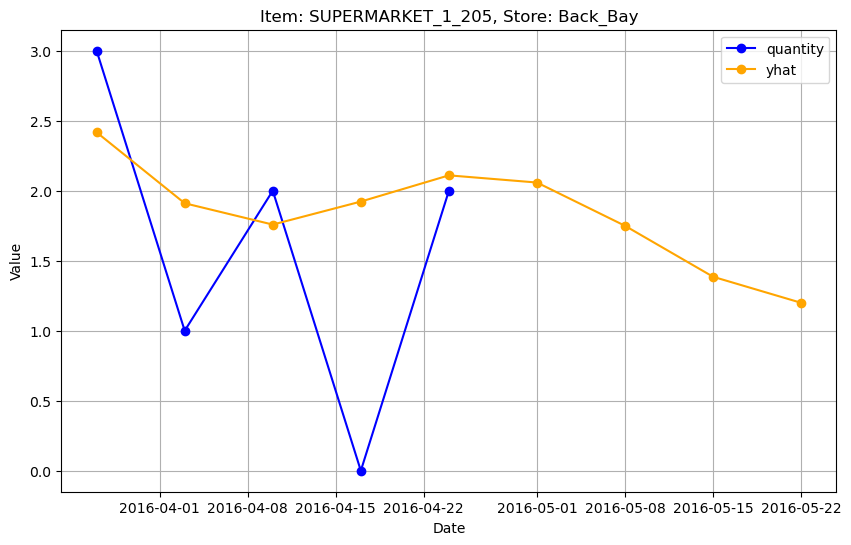

In [133]:
import matplotlib.pyplot as plt

# Seleccionamos un item y tienda
selected_item = 'SUPERMARKET_1_205'  
selected_store = 'Back_Bay'  

# Filtramos las filas para ese artículo y tienda
df_item_store = prueba_final[(prueba_final['item'] == selected_item) & (prueba_final['store'] == selected_store)]

# Filtramos por rango de fechas (desde 2016-03-27 hasta 2016-05-15)
start_date = '2016-03-27'
end_date = '2016-05-22'
df_item_store = df_item_store[(df_item_store['date'] >= start_date) & (df_item_store['date'] <= end_date)]

# Creamos un gráfico de línea para el artículo y tienda seleccionados
plt.figure(figsize=(10, 6))
plt.plot(df_item_store['date'], df_item_store['quantity'], label='quantity', marker='o', linestyle='-', color='blue')
plt.plot(df_item_store['date'], df_item_store['yhat'], label='yhat', marker='o', linestyle='-', color='orange')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Item: {selected_item}, Store: {selected_store}')
plt.legend()
plt.grid(True)

# Muestra el gráfico
plt.show()

